In [66]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb

from os import path

dirname ='/Users/xies/Library/CloudStorage/OneDrive-Stanford/Skin/Mesa et al/W-R1/'

dirname = '/Users/xies/OneDrive - Stanford/Skin/Mesa et al/W-R1/'
all_df = pd.read_pickle(path.join(dirname,'Mastodon/single_timepoints_dynamics_aggregated_lookback_history.pkl'))
all_df = all_df.drop_duplicates().sort_index()
tracks = {trackID:t.reset_index(drop=True) for trackID,t in all_df.reset_index().groupby('TrackID')}


## Grab the sister pairs

In [70]:
sisterIDs = set()
sisters = []
for trackID,t in tracks.items():
    if not np.isnan(t.iloc[0]['Sister','Meta']):
        if t.iloc[0]['Sister','Meta'] not in sisterIDs and trackID not in sisterIDs:
            sisterIDs.add(trackID)
            sisterIDs.add(t.iloc[0]['Sister','Meta'])
            sisters.append((t, tracks[int(t.iloc[0]['Sister','Meta'])]))

### Calculate pair-wise 
@Todo: Account for different lifetimes

In [115]:
# Things to measure: cell growth rate, fates, cell volume

sister_differences = pd.DataFrame()

for i,(a,b) in enumerate(sisters):
    # Filter for both sisters fate known
    if not a.iloc[0]['Fate known','Meta'] or not b.iloc[0]['Fate known','Meta']:
        continue
    
    a_diff = a.iloc[0]['Will differentiate','Meta']
    b_diff = b.iloc[0]['Will differentiate','Meta']
    if int(a_diff) + int(b_diff) == 1:
        sister_differences.loc[i,'Fate'] = 'Asymmetric'
    else:
        if a_diff:
            sister_differences.loc[i,'Fate'] = 'Differentiate'
        else:
            sister_differences.loc[i,'Fate'] = 'Divide'
            
    sister_differences.loc[i,'Sister a'] = a.iloc[0]['TrackID','']
    sister_differences.loc[i,'Sister b'] = b.iloc[0]['TrackID','']
    
    if sister_differences.loc[i,'Fate'] == 'Divide':
        sister_differences.loc[i,'Diff cell cycle time'] = np.abs(len(a) - len(b)) * 12
    else:
        sister_differences.loc[i,'Diff cell cycle time'] = np.nan

    f = 'Cell volume exponential growth rate'
    sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Nuclear volume exponential growth rate'
    sister_differences.loc[i,f'Diff {f}'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Cell volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Nuclear volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Cell volume smoothed'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])
    f = 'Basal area'
    sister_differences.loc[i,f'Diff {f} at birth'] = np.abs(a.iloc[0][f,'Measurement'] - b.iloc[0][f,'Measurement'])


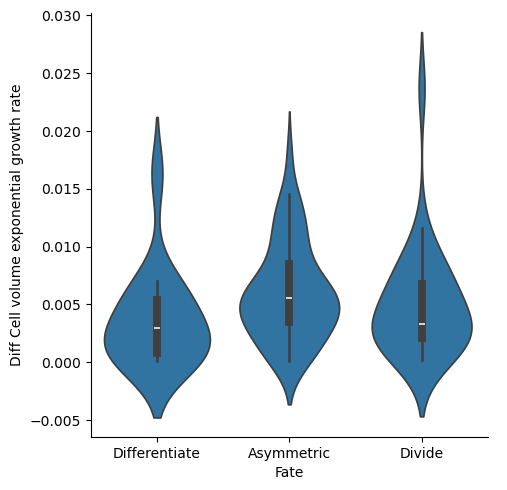

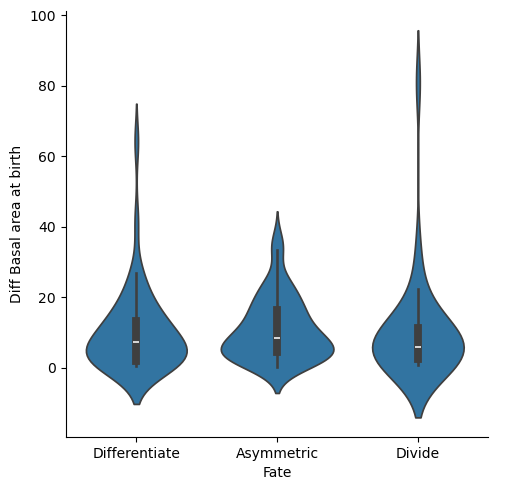

In [116]:
sb.catplot(sister_differences,x='Fate',y='Diff Cell volume exponential growth rate',kind='violin')
sb.catplot(sister_differences,x='Fate',y='Diff Basal area at birth',kind='violin')

In [97]:
(sister_differences['Fate']  == 'Differentiate').sum()

0

In [111]:
(a,b) = sisters[0]
a_diff = a.iloc[0]['Will differentiate','Meta']
b_diff = b.iloc[0]['Will differentiate','Meta']

In [114]:
int(a_diff + b_diff)

1